In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
matplotlib.rcParams.update({
    'font.family': 'Arial',
    'font.size': 15
})

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
diabetes_X = np.concatenate([diabetes_X, np.ones((len(diabetes_X), 1))], axis=1)
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [4]:
X_train = torch.from_numpy(diabetes_X_train)
y_train = torch.from_numpy(diabetes_y_train)

X_test = torch.from_numpy(diabetes_X_test)
y_test = torch.from_numpy(diabetes_y_test)

In [5]:
class LinearRegression:
    def fit(self, X, y):
        self.w = torch.linalg.lstsq(X, y).solution
    
    def predict(self, X):
        return torch.matmul(X, self.w)

In [6]:
clf = LinearRegression()
clf.fit(X_train, y_train)

In [7]:
pred = clf.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, pred)

In [9]:
r2 = r2_score(y_test, pred)

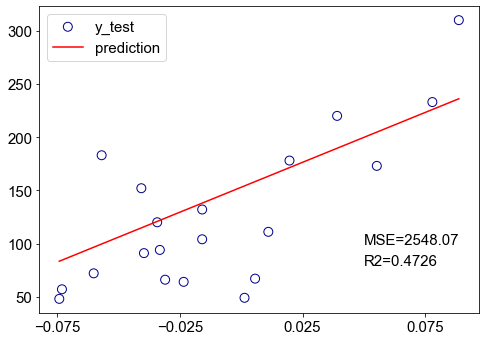

In [10]:
plt.figure(figsize=(7, 5))
plt.scatter(X_test[:, 0], y_test, facecolor='None', edgecolor='darkblue', s=80, label='y_test')
input_x = torch.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
input_x = torch.stack([input_x, torch.ones(100)]).T.double()
out = clf.predict(input_x)
plt.plot(input_x[:, 0], out, 'r', label='prediction')
plt.legend()
_ = plt.xticks(torch.arange(-0.075, 0.11, 0.05))
plt.text(0.05, 100, 'MSE=%.2f' % mse)
plt.text(0.05, 80, 'R2=%.4f' % r2)
plt.tight_layout()
plt.savefig('lr.png')